In [1]:
#pip install xgboost

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as sco
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as mcolors
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import time

In [51]:
cr_loan = pd.read_csv("cr_loan2.csv")

In [54]:
%%time

# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
cr_loan

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
CPU times: user 2.7 ms, sys: 3.45 ms, total: 6.15 ms
Wall time: 6.37 ms


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


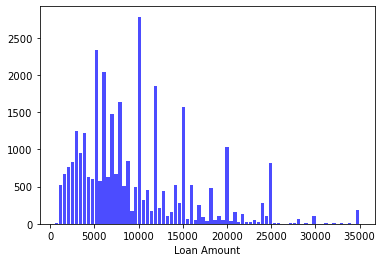

In [55]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


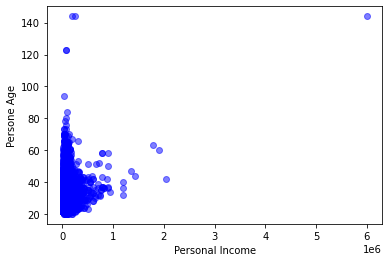

In [56]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [57]:
print(cr_loan.head())
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan["person_home_ownership"],[cr_loan["loan_status"],cr_loan["loan_grade"]]))

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [58]:
print(cr_loan.head())
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan["person_home_ownership"], cr_loan["loan_status"],
              values=cr_loan["loan_percent_income"], aggfunc="mean"))

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


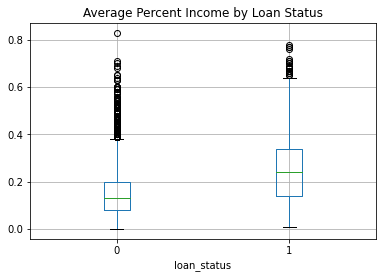

In [59]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ["loan_percent_income"], by = "loan_status")
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [60]:
pd.crosstab (cr_loan ['person_home_ownership'], cr_loan ['loan_status'],
values=cr_loan ['loan_int_rate'], aggfunc='mean').round (2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [61]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan["loan_intent"], cr_loan["loan_status"], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [62]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan["loan_status"],cr_loan["person_home_ownership"],
        values=cr_loan["person_emp_length"], aggfunc="max"))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [63]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan["person_emp_length"] > 60].index

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [64]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [65]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
                  values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


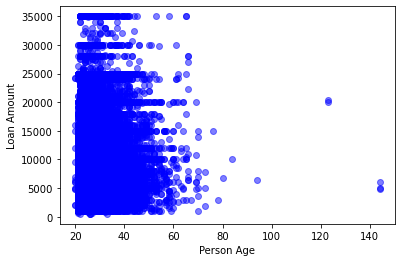

In [66]:
print(cr_loan.head())

# Create the scatter plot for age and amount
plt.scatter(cr_loan["person_age"], cr_loan["loan_amnt"], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

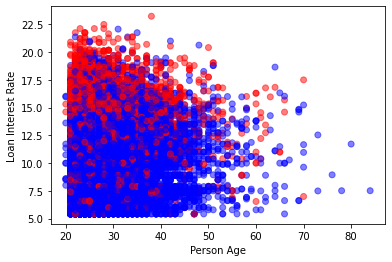

In [67]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan["person_age"] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue", "red"]
plt.scatter(
    cr_loan_new["person_age"],
    cr_loan_new["loan_int_rate"],
    c=cr_loan_new['loan_status'],
    cmap=mcolors.ListedColormap(colors),
    alpha=0.5
)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

In [68]:
# null_columns = cr_loan.columns[cr_loan.isnull().any ()]
# cr_loan[null_columns].isnull().sum()

# cr_loan['loan_int_rate'].fillna((cr_loan['loan_int_rate'].mean()), inplace = True)

# indices = cr_loan [cr_loan ['person_emp_length'].isnull()].index
# cr_loan.drop(indices, inplace=True)

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

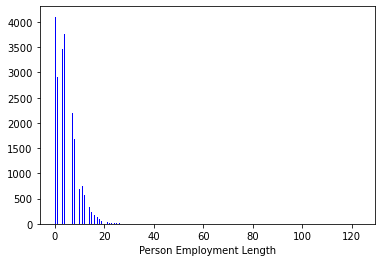

In [69]:
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan["person_emp_length"].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan["person_emp_length"].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan["person_emp_length"], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [70]:
# Print the number of nulls
print(cr_loan["loan_int_rate"].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan["loan_int_rate"].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


In [71]:
# clf_logistic = LogisticRegression (solver='bfgs')
# clf_logistic.fit(training_columns, np.ravel (training_labels))

In [72]:
# Create the X and y data sets
X = cr_loan_clean[["loan_int_rate"]]
y = cr_loan_clean[["loan_status"]]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4586918]


In [73]:
# Create X data for the model
X_multi = cr_loan_clean[["loan_int_rate","person_emp_length"]]

# Create a set of y data for training
y = cr_loan_clean[["loan_status"]]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2253171]


In [74]:
# Create the X and y data sets
X = cr_loan_clean[["loan_int_rate","person_emp_length","person_income"]]
y = cr_loan_clean[["loan_status"]]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


In [75]:
# Separate the numeric columns
cred_num = cr_loan.select_dtypes(exclude=['object'])
# Separate non-numeric columns
cred_cat = cr_loan.select_dtypes(include=['object'])
# One-hot encode the non-numeric columns only
cred_cat_onehot = pd.get_dummies(cred_cat)
# Union the numeric columns with the one-hot encoded columns
cr_loan = pd.concat([cred_num, cred_cat_onehot], axis=1)
cr_loan

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [76]:
# Train the model
clf_logistic.fit(X_train, np.ravel(y_train))
# Predict using the model
clf_logistic.predict_proba(X_test)

array([[0.79640467, 0.20359533],
       [0.86259881, 0.13740119],
       [0.88037836, 0.11962164],
       ...,
       [0.65634664, 0.34365336],
       [0.95987007, 0.04012993],
       [0.95050992, 0.04949008]])

In [77]:
# Print the first five rows of each training set
print(X_train.head())
print(y_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(y_train, np.ravel(y_train))

#Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       loan_int_rate  person_emp_length  person_income
25231           7.66               13.0          81900
25262          11.99                2.0          47700
21498          13.48                6.0          48000
1774           13.49                2.0          19200
11441           6.03                7.0          75000
       loan_status
25231            0
25262            0
21498            0
1774             0
11441            0
[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]
[[12.70608739]]


In [78]:
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [79]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()
preds_df.head()
true_df.head()
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.203595
1            0      0.137401
2            0      0.119622
3            0      0.307440
4            0      0.505785


In [80]:
# Check the accuracy against the test data
clf_logistic.score(X_test,y_test)

0.7995078907178008

In [81]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df["loan_status"].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    10861
1      925
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786



In [82]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df["loan_status"], target_names=target_names))

# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test, preds_df["loan_status"])[1][1])

# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test, preds_df["loan_status"])[1])

              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786

0.22260802469135801
[0.96214923 0.22260802]


0.7995078907178008


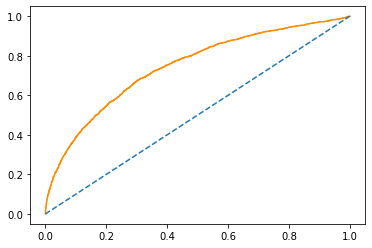

In [83]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default )

In [84]:
# Set the threshold for defaults to 0.5
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.5 else 0)
thresh = preds_df["loan_status"]
# Print the confusion matrix
print(confusion_matrix(y_test,thresh))

[[8846  348]
 [2015  577]]


In [85]:
# Set the threshold for defaults to 0.4
preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df["loan_status"]))

[[8074 1120]
 [1477 1115]]


In [86]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]
avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()
print(avg_loan_amnt)
# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9584.744612251825
12206848.964421853


In [87]:
preds_df.head()

,prob_default,loan_status
0,0.203595,0
1,0.137401,0
2,0.119622,0
3,0.307440,0
4,0.505785,1


In [88]:
#thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]

In [89]:
# plt.plot(thresh,default_recall)
# plt.plot(thresh,nondef_recalls)
# plt.plot(thresh,accs)
# plt.xlabel("Probability Threshold")
# plt.xticks(ticks)
# plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
# plt.show()

In [90]:
# Train a model
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.iloc[0:5]

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.101143
1            0      0.369374
2            0      0.008102
3            0      0.111173
4            0      0.468178


In [91]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio["lr_expected_loss"] = portfolio["lr_prob_default"] * portfolio["lgd"] * portfolio["loan_amnt"]
portfolio["gbt_expected_loss"] = portfolio["gbt_prob_default"] * portfolio["lgd"] * portfolio["loan_amnt"]

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio["lr_expected_loss"]))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio["gbt_expected_loss"]))

NameError: name 'portfolio' is not defined

In [92]:
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.86      0.96      0.91      9194
     Default       0.74      0.45      0.56      2592

    accuracy                           0.84     11786
   macro avg       0.80      0.70      0.73     11786
weighted avg       0.83      0.84      0.83     11786



In [93]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_int_rate': 1205.0, 'person_emp_length': 692.0, 'person_income': 1646.0}


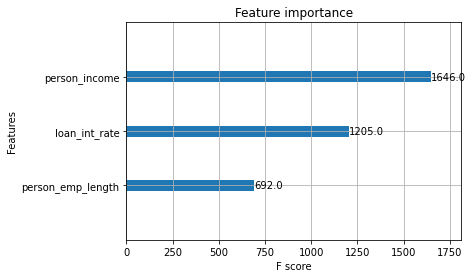

In [94]:
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

In [98]:
# Create a gbt model
xg = xgb. XGBClassifier (learning_rate = 0.4, max_depth = 10)
# Use cross valuation and accuracy scores 5 consecutive times
cross_val_score (clf_gbt, X_train, y_train, cv = 5)

array([0.83625566, 0.8334276 , 0.83823529, 0.84134615, 0.83818953])

In [99]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Set any specific parameters for cross validation
params = {'objective': 'binary:logistic',
'seed': 99, 'eval_metric':'auc'}

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.818494       0.002535       0.805560      0.006029
1        0.827184       0.001601       0.812771      0.006337
2        0.831185       0.000866       0.816614      0.006333
3        0.834246       0.001208       0.818098      0.005989
4        0.837411       0.001652       0.818494      0.006561


In [100]:
%%time
cv = xgb.cv(params,DTrain,num_boost_round = 600, nfold=10,
            shuffle = True)
cv

CPU times: user 2min 37s, sys: 20.3 s, total: 2min 57s
Wall time: 24.6 s


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.818243,0.001732,0.808039,0.008805
1,0.825208,0.002438,0.812048,0.007592
2,0.830289,0.001082,0.817161,0.009188
3,0.833842,0.000987,0.818823,0.009296
4,0.836811,0.001559,0.820414,0.008519
...,...,...,...,...
595,0.984145,0.000571,0.822204,0.010551
596,0.984161,0.000577,0.822186,0.010611
597,0.984191,0.000569,0.822190,0.010638
598,0.984217,0.000565,0.822196,0.010689


In [104]:
# Check the type of the cv object
print(type(cv))

# Check the column names in the cv DataFrame
print(cv.columns)

# Check the data type of the 'test-auc-mean' column
print(cv['test-auc-mean'].dtype)

# Check for any missing or non-numeric values in the 'test-auc-mean' column
print(cv['test-auc-mean'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index(['train-auc-mean', 'train-auc-std', 'test-auc-mean', 'test-auc-std'], dtype='object')
float64
0


   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.818243       0.001732       0.808039      0.008805
1        0.825208       0.002438       0.812048      0.007592
2        0.830289       0.001082       0.817161      0.009188
3        0.833842       0.000987       0.818823      0.009296
4        0.836811       0.001559       0.820414      0.008519


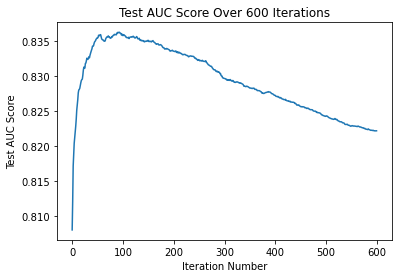

In [115]:
# Print the first five rows of the CV results data frame
print(cv.head())

# Calculate the mean of the test AUC scores
#mean_auc = np.mean(cv['test-auc-mean'])

# Plot the test AUC scores for each iteration
plt.plot(cv['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [116]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.83846154 0.83031674 0.84298643 0.84227201]
Average accuracy: 0.84 (+/- 0.01)


In [118]:
y_train['loan_status'].value_counts ()

0    13807
1     3872
Name: loan_status, dtype: int64

In [122]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train["loan_status"] == 0]
defaults = X_y_train[X_y_train["loan_status"] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under["loan_status"].value_counts())

0    3872
1    3872
Name: loan_status, dtype: int64


In [125]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.96      0.91      9194
     Default       0.74      0.45      0.56      2592

    accuracy                           0.84     11786
   macro avg       0.80      0.70      0.73     11786
weighted avg       0.83      0.84      0.83     11786



In [126]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds))

[[8790  404]
 [1423 1169]]


In [127]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))

0.703530692655167
